In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Исследование данных

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(f"train: {train.shape}")
print(f"test: {test.shape}")

In [ ]:
print("Число пропусков в train:")
print(train.isna().sum())
print("Число пропусков в test:")
print(test.isna().sum())

In [ ]:
df.head # Краткая сводка первичной информации
df.shape # мы увидим информацию о размерности нашего датафрейма 
df.info() # покажет информацию о размерности данных 
          # описание индекса, количество not-a-number элементов 
df.describe() # показывает статистики count, mean, std, min, 25%-50%-75% percentile, max 
df.nunique() # количество уникальных значений для каждого столбца 

In [ ]:
# Количество каждого уникального значения для каждого столбца в наборе данных:
feature_names = df.columns.tolist() 
for column in feature_names: 
    print column 
    print df[column].value_counts(dropna=False)

# Предобработка данных

In [ ]:
# Если нужно объединить датасеты
formula_train = formula_train.drop(columns=['critical_temp']) # Удаляешь не нужные колонки
train_full = pd.concat([train, formula_train], axis=1) # Объединяешь
print(f"Full Train dataset shape: {train_full.shape}") # Проверяешь

In [ ]:
# Удалим не нужные колонки из данных
df.drop(columns=['Название колонок'], inplace=True)

In [ ]:
# Проверка баланса классов если нужно (50% на 50% идеально) (категориальные признаки)
# Лучше всего добавлять в меньший класс данные (oversampling)
# Дублирование объектов, Генерация синтетических объектов, imblearn
df['Название колонки'].value_counts() # Посмотреть распределение для выбранной колонки

from imblearn.over_sampling import SMOTE

# Применение SMOTE для балансировки классов
X_resampled, y_resampled = SMOTE().fit_resample(X, y) # но это уже перед обучением модели если надо будет

In [ ]:
# Превращаем строковые данные в числовые
# Разложение строки на несколько строк если в ней есть несколько переменных а не по одной в строке
# Выбрем признаки, которые являются категориальными (строковыми)
cat_features = train.loc[:, train.dtypes == object].columns

categ = ['', '', ''] # Список всех столбцов для преобразования
for col in categ:
    le = preprocessing.LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
#train = pd.get_dummies(train, columns=['hotel', 'market_segment', 'deposit_type']) Если нужно разложение на несколько
train.head()

In [ ]:
# Scikit-learn предоставляет реализацию для обработки пропусков
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(features)
features = imputer.transform(features)

In [ ]:
# Заполним пропуски с помощью среднего значения
col_missing = ['', '', ''] # Название столбцов где есть пропуски

for i in col_missing:
    df[i].fillna(df[i].mean(), inplace=True)

df.isna().sum()

In [ ]:
# Поиск неявных дубликатов только для пола
male_terms = ["male", "m", "mal", "msle", "malr", "mail", "make", "cis male", "man", "maile", "male (cis)", "cis man"] 
female_terms = ["female", "f", "woman", "femake", "femaile", "femake", "cis female", "cis-female/femme", "female (cis)", "femail", "cis woman"] 

def clean_gender(response): 
    if response.lower().rstrip() in male_terms: 
        return "Male" 
    elif response.lower().rstrip() in female_terms: 
        return "Female" 
    else:  
        return "Other" 

df['Gender'] = df["Gender"].apply(lambda x: clean_gender(x)) 

In [ ]:
# Обнаружение выбросов только для Age для других сам думай
df.Age.loc [(df.Age <14) | (df.Age> 100)] = np.nan

In [ ]:
# Кодирование данных
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['leave']) 
label_encoder.transform(df['leave'])

In [ ]:
# get_dummies
# Using Pandas
import pandas as pd 
pd.get_dummies(features['leave']) 

# Using sklearn 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
label_encoder = LabelEncoder()   
ohe = OneHotEncoder(categorical_features = ['leave'])  
label_encoded_data = label_encoder.fit_transform(features['leave']) 
ohe.fit_transform(label_encoded_data.reshape(-1,1)) 

ML алгоритмы, которые требуют нормализации данных:
Логистическая регрессия
Метод опорных векторов
Нейронная сеть
PCA

ML алгоритмы, которые не требуют нормализации данных:
Деревья принятия решений (и случайные леса)
Градиентный бустинг
Наивный Байес

In [ ]:
# Нормализация
# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
features_train = scale_features_std.fit_transform(features_train) 
features_test = scale_features_std.transform(features_test) 

# Feature scaling with MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler 
scale_features_mm = MinMaxScaler() 
features_train = scale_features_mm.fit_transform(features_train) 
features_test = scale_features_mm.transform(features_test) 

In [ ]:
# Логарифмирование
# логарифмирование применяется только к положительным числам.
price = data.price
y = np.log(price)

In [ ]:
# Под конец все проверяем
train.head()

In [ ]:
train.info()

In [ ]:
# Распределение классов
# Распределение по атрибуту class
print(dataset.groupby('class').size())

# Обучение

In [ ]:
# Выделим из набора данных вектор признаков и вектор ответов
find_column = 'Столбец который нужно предсказать'
X = train.drop(columns=[find_column])
y = train[find_column]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

In [ ]:
# Делим датасет для его дальнейшего обучения Если один датасет
do_this = False
if do_this:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
    print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

# Выбор модели

In [ ]:
# Загружаем алгоритмы модели
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# оцениваем модель на каждой итерации
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
# Сравниванием алгоритмы
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

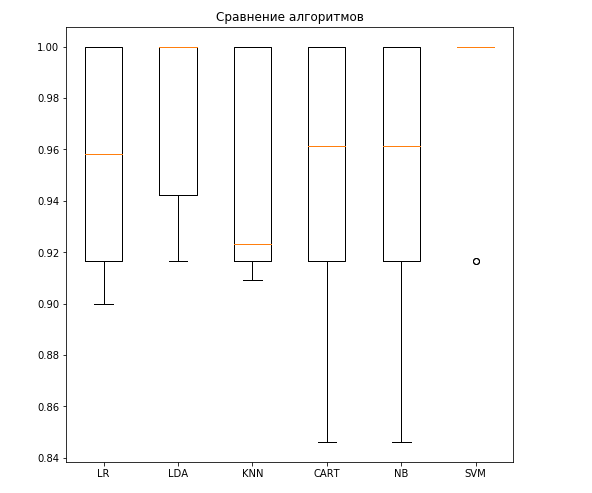

In [ ]:
# Создадим модель линейной регрессии
model = LinearRegression() # Используем когда нужно найти числовое значение переменной (Регрессия)
model = LogisticRegression() # классификация
model = DecisionTreeClassifier() # Создадим модель дерева решений

# Обучение модели на данных
model.fit(X, y)

# Предсказание и проверка значений
answers_pred = model.predict(X)

In [ ]:
# Кластеризация
n_clusters = 10
clusterer = KMeans(n_clusters=n_clusters)
cluster_labels = clusterer.fit_predict(df)
inertia = clusterer.inertia_

In [ ]:
# Метрики для регрессии
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

In [ ]:
# Метрики для классификации
# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(f'Accuracy: {accuracy_score(y, answers_pred)}')
print(f'Precision: {precision_score(y, answers_pred)}')
print(f'Recall: {recall_score(y, answers_pred)}')

In [ ]:
# Сохранение результатов
y_pred_test = model.predict(test)
y_pred_test = pd.DataFrame(y_pred_test, columns=['Название колонки'])
y_pred_test = y_pred_test.reset_index()
y_pred_test.to_csv("solution.csv", index=False)

# Прогнозирование

In [ ]:
# Создаем прогноз на контрольной выборке
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Оцениваем прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

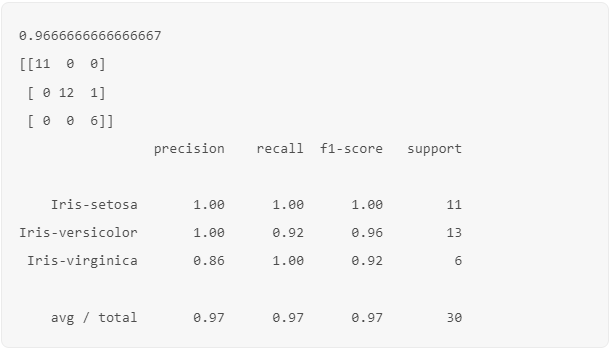

In [ ]:
import joblib

# Сохранение модели в файл
filename = 'finalized_model.sav'
joblib.dump(model, filename)

# Загрузка модели из файла
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)